In [1]:
import gym
import copy
import numpy as np
import time as time
import torch
import torch.nn as nn
import gym_flappyBird
import genetics as gen
from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt
import math
import pygame
from pygame.locals import *

pygame 2.0.2 (SDL 2.0.16, Python 3.8.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


  
### Bird attributes

### bird.Y = 250
### bird.X = 80
### bird.speedY= 0
### bird.speedX = 20
### bird.force = [0.0, 0.0] 

# Maschine

## Feature extrahieren

<img src="sprites/ingame.jpg" align="left" >

In [2]:
def generateFeatures(state):
    bird = state['bird']
    #print(type(bird))
    posY = bird.Y
    speedY = bird.speedY
    pipes = state['pipes']
    #print(pipes[0].pos)
    return posY, speedY, pipes[0].pos,pipes[0].height,pipes[0].gap

## Reward  berechnen

<img src="sprites/ingame_2.jpg" align="left" >

In [3]:
def computeReward(state_old, state_new):
    return 1

# Aktion festlegen

In [4]:
def birdAction(decission, bird):
        bird.force = [0.0, 50*decission[0]]

# Mutationsparameter

<img src="sprites/ingame_3.jpg" align="left" >

In [5]:
NOISE_STD = 0.1
POPULATION_SIZE = 150
PARENTS_COUNT = 15

# Neuronales Netz 

## Layer
nn.Linear(X, Y), Input dim X, Output dim Y

## Aktivierungsfunktionen
nn.ReLU()


nn.Sigmoid()


nn.Softmax(dim=1))



## Topologie
nn.Sequential(Layer, Aktivierungsfunktion, Layer, Aktivierungsfunktion...., Layer,Softmax)
###### Beispiel
nn.Sequential(nn.Linear(5, 5),nn.Softmax(dim=1))

In [6]:
net = nn.Sequential(nn.Linear(5, 5),nn.Sigmoid(),nn.Linear(5, 5),nn.Sigmoid(), nn.Linear(5, 1))

In [7]:
#net = nn.Sequential(nn.Linear(5, 5),nn.ReLU(),nn.Linear(5, 2),nn.Softmax(dim=1))

In [8]:
for name, param in net.named_parameters():
    print(name, param)

0.weight Parameter containing:
tensor([[ 0.1146, -0.2633,  0.2588,  0.1978,  0.1967],
        [ 0.3867,  0.2816,  0.3148, -0.1502, -0.0531],
        [ 0.3564,  0.4197, -0.0005, -0.2193, -0.2501],
        [-0.0654,  0.3174,  0.3225,  0.0449, -0.2136],
        [-0.0284, -0.2354, -0.0430,  0.2680, -0.3979]], requires_grad=True)
0.bias Parameter containing:
tensor([ 0.0899, -0.0545,  0.2421,  0.3918, -0.2352], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.2140,  0.0647,  0.3980,  0.1740, -0.3333],
        [ 0.3054,  0.0546,  0.2387, -0.4429,  0.2516],
        [-0.3061, -0.1700, -0.1809, -0.4144, -0.2618],
        [-0.4064,  0.4308, -0.2871, -0.1525, -0.1762],
        [ 0.4414, -0.4338,  0.1576,  0.4279,  0.0375]], requires_grad=True)
2.bias Parameter containing:
tensor([-0.4045, -0.1158, -0.0036,  0.0458,  0.1965], requires_grad=True)
4.weight Parameter containing:
tensor([[-0.2579, -0.1861, -0.1880,  0.4280,  0.0920]], requires_grad=True)
4.bias Parameter containing:
tens

## Abstand zwischen den Pipes,  Höhe der Pipes, Grösse der Lücke

In [9]:
Interval_distance = [250, 350]
Interval_height = [100,300]
Interval_gap = [120,130]

## Max Score

In [10]:
Score_Max = 4000

In [11]:
fittestBirds = []

env = gym.make("scienceCampBird-v1")
env.setPipeIntervals([Interval_distance, Interval_height,Interval_gap])
population = gen.Population(POPULATION_SIZE, 5, 2, computeReward, net)
env.setAction(birdAction)
  #  print(len(population.nets))
population.evaluate_on_env(env,generateFeatures, Score_Max)
ecount = 0  
while True:
    population = gen.mutate_population(population, PARENTS_COUNT, NOISE_STD)
    population.evaluate_on_env(env, generateFeatures, Score_Max)
    fittestBirds.append(population.population[0])
    ecount +=1
    if(ecount % 5 == 0):
        print("evaluaton")
        net = population.population[0][1]
        score_e = population.population[0][0]
        score_p = env.playWithNet(net, generateFeatures, Score_Max, computeReward, ecount)
        print("----------------------------------------------------------------------------")
        print("----------------------------------------------------------------------------")
        print('Population: ', ecount)
        print("____________________________________________________________________________")
        print('Score Training: ', score_e, ' Score Spiel: ', score_p)
        print("____________________________________________________________________________")
        for name, param in net.named_parameters():
            print(name, param)

evaluaton
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  5
____________________________________________________________________________
Score Training:  279.0  Score Spiel:  236.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[ 0.2800, -0.7521,  0.0438,  0.0486,  0.3287],
        [ 0.3158,  0.5089,  0.4564, -0.3036,  0.0313],
        [ 0.2840,  0.3023,  0.4634, -0.5417, -0.3343],
        [-0.0929,  0.1679,  0.3807,  0.3078, -0.2208],
        [-0.2534,  0.0276,  0.2505,  0.0794, -0.3601]], requires_grad=True)
0.bias Parameter containing:
tensor([-0.1129, -0.2574,  0.2404, -0.1939, -0.5075], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.5178,  0.0292,  0.3141,  0.2859, -0.4175],
        [ 0.4453, -0.3001,  0.0539, -0.5794,  0.1993],
        [-0.4598, -0.3439,  0.5177, -0.2164, -0.7638

KeyboardInterrupt: 

# Plott

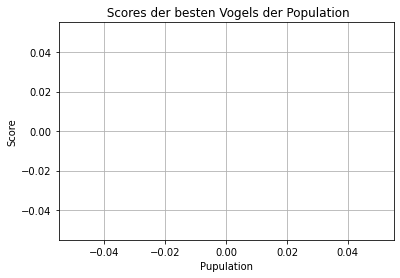

In [12]:
scores = [score[0] for score in fittestBirds]
fig, ax = plt.subplots()
ax.plot(scores)

ax.set(xlabel='Pupulation', ylabel='Score',
       title=' Scores der besten Vogels der Population')
ax.grid()

fig.savefig("test.png")
plt.show()

In [13]:
i = 0
for bird in fittestBirds:
        i +=1
        net = bird[1]
        score_p = bird[0]
        print("----------------------------------------------------------------------------")
        print("----------------------------------------------------------------------------")
        print('Population: ', i)
        print("____________________________________________________________________________")
        print('Score: ', score_p)
        print("____________________________________________________________________________")
        for name, param in net.named_parameters():
            print(name, param)